# Dataset import and exploration


In [122]:
import numpy as np
import pandas as pd




In [123]:
#fingerprints = pd.read_csv("pubchemfprints.csv")
#fingerprints = pd.read_csv("criptors.csv")
fingerprints = pd.read_csv("morgan.csv")
fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#data = pd.read_csv("combined.csv")
#data
data = pd.read_csv("pred.csv")
data.rename(columns = {'Standard_Value':'IC50'}, inplace = True)
data

,Smiles,Molecule_ChEMBL_ID,IC50
0,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,CHEMBL1336,0.588
1,Cc1cccc(NC(=O)c2cccc(N3CCc4nc(N)ncc4C3)c2)c1,CHEMBL3702603,114.000
2,Cc1ccc(-c2cc3nnnc(N4CCOCC4)c3[se]2)cc1,CHEMBL2377475,25118.860
3,Cc1cc(Oc2cc(NC(=O)C3CC3)ncn2)ccc1NC(=O)Nc1ccc(...,CHEMBL3904153,8.900
4,Cc1cc(Oc2cc(NC(=O)C3CC3)ncn2)ccc1NC(=O)Nc1cc(N...,CHEMBL3889762,12.500
...,...,...,...
12488,Cc1ccc(C)c(NC(=O)Nc2nc(Sc3c[nH]c4ccccc34)cc(N3...,CHEMBL4797072,310.000
12489,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,CHEMBL1336,90.000
12490,COc1ccc(NC(=O)Nc2ccc(C(=O)N/N=C3\C(=O)Nc4ccc(F...,CHEMBL4458736,3790.000
12491,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,CHEMBL24828,22.000


In [ ]:
data.Molecule_ChEMBL_ID	[]

In [125]:
#x = fingerprints.drop("Name", axis = 1)
x = fingerprints
y = data["IC50"]

In [126]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

x = remove_low_variance(x, threshold=0.1)
x

,Col_1,Col_43,Col_56,Col_74,Col_80,Col_114,Col_161,Col_168,Col_184,Col_191,...,Col_1917,Col_1928,Col_1951,Col_1970,Col_1974,Col_1978,Col_1984,Col_1989,Col_1990,Col_2004
0,0,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,0,1,1,0
4,0,0,1,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12489,0,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,0,1,1,0
12490,0,0,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,1,0
12491,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


<br>

# Data preparation for ML

- We'll MinMaxScale the numerical features and one-hot encode the categorical ones
- The features `waterfront`, `was_renovated`, `was_renovated_10_yrs` and `was_renovated_30_yrs` are ignored, since they're already in (0, 1) format

- Train/test split - 80:20:

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((9994, 107), (2499, 107))

<br>

# Model training

In [128]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

- RMSE is the best metric, as the error is displayed in the same units the target variable is in

In [129]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

- Really simple model:

Epoch 1/6000


C:\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 7s 18ms/step - loss: 29032.5391 - rmse: 29029.3535 - val_loss: 20670.7891 - val_rmse: 20706.0039
Epoch 2/6000
250/250 [==============================] - 4s 16ms/step - loss: 28512.1465 - rmse: 28508.6289 - val_loss: 20841.1895 - val_rmse: 20874.1289
Epoch 3/6000
250/250 [==============================] - 4s 16ms/step - loss: 26601.3691 - rmse: 26595.3242 - val_loss: 18725.3418 - val_rmse: 18780.4004
Epoch 4/6000
250/250 [==============================] - 4s 16ms/step - loss: 25664.4746 - rmse: 25651.2617 - val_loss: 18610.1055 - val_rmse: 18671.2324
Epoch 5/6000
250/250 [==============================] - 4s 16ms/step - loss: 24902.9805 - rmse: 24893.8438 - val_loss: 18391.6797 - val_rmse: 18455.3477
Epoch 6/6000
250/250 [==============================] - 4s 16ms/step - loss: 24633.5820 - rmse: 24623.1973 - val_loss: 18364.6055 - val_rmse: 18426.4277
Epoch 7/6000
250/250 [==============================] - 4s 16ms/step - loss: 24361.8145 - rmse:

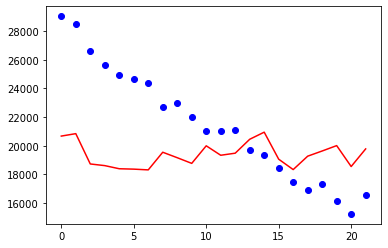

In [130]:
from keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(lr=0.0001),
    metrics=[rmse]
)

#model.fit(X_train, y_train, epochs=100)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train, epochs = 6000, validation_split = 0.2,shuffle = True, verbose = 1, 
                 callbacks=earlystopper   )

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [131]:
predictTest = model.predict(X_test)
predictTrain = model.predict(X_train)

# Evaluating training set

In [132]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_train.values.ravel(), predictTrain)
mse = mean_squared_error(y_train.values.ravel(), predictTrain)
r2 = r2_score(y_train.values.ravel(), predictTrain)

# Print metrics
import math
print('Mean Absolute Error:', round(mae/(y_train.max()-y_train.min()), 4))
print('Root Mean Squared Error:', round(math.sqrt(mse)/(y_train.max()-y_train.min()),4))
print('R-squared scores:', round(r2, 4))

Mean Absolute Error: 0.0013
Root Mean Squared Error: 0.0106
R-squared scores: 0.438


# Evaluating testing set

In [133]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae = mean_absolute_error(y_test.values.ravel(), predictTest)
mse = mean_squared_error(y_test.values.ravel(), predictTest)
r2 = r2_score(y_test.values.ravel(), predictTest)

# Print metrics
import math
print('Mean Absolute Error:', round(mae/(y_test.max()-y_test.min()), 4))
print('Root Mean Squared Error:', round(math.sqrt(mse)/(y_test.max()-y_test.min()), 4))
print('R-squared scores:', round(r2, 4))

Mean Absolute Error: 0.0065
Root Mean Squared Error: 0.0258
R-squared scores: 0.5329
